# Confined Aquifer Test
**This test is taken from AQTESOLV examples.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ttim import *

Set basic parameters:

In [2]:
Q = 6605.754 #constant discharge in m^3/d
b = -15.24 #aquifer thickness in m
rw = 0.1524 #well radius in m

Load data of three observation wells:

In [3]:
data1 = np.loadtxt('data/sioux100.txt')
t1 = data1[:, 0]
h1 = data1[:, 1]
r1 = 30.48 #distance between obs1 to pumping well

data2 = np.loadtxt('data/sioux200.txt')
t2 = data2[:, 0]
h2 = data2[:, 1]
r2 = 60.96 #distance between obs2 to pumping well

data3 = np.loadtxt('data/sioux400.txt')
t3 = data3[:, 0]
h3 = data3[:, 1]
r3 = 121.92 #distance between obs3 to pumping well

Create conceptual model:

In [4]:
ml_0 = ModelMaq(kaq=10, z=[0, b], Saq=0.001, tmin=0.001, tmax=10, topboundary='conf')
w_0 = Well(ml_0, xw=0, yw=0, rw=rw, tsandQ=[(0, Q)], layers = 0)
ml_0.solve()

self.neq  1
solution complete


Calibrate with three datasets simultaneously:

In [5]:
#unknown parameters: k, Saq
ca_0 = Calibrate(ml_0)
ca_0.set_parameter(name='kaq0', initial=10)
ca_0.set_parameter(name='Saq0', initial=1e-4)
ca_0.series(name='obs1', x=r1, y=0, t=t1, h=h1, layer=0)
ca_0.series(name='obs2', x=r2, y=0, t=t2, h=h2, layer=0)
ca_0.series(name='obs3', x=r3, y=0, t=t3, h=h3, layer=0)
ca_0.fit(report=True)

........................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 77
    # variables        = 2
    chi-square         = 0.00121634
    reduced chi-square = 1.6218e-05
    Akaike info crit   = -847.289957
    Bayesian info crit = -842.602346
[[Variables]]
    kaq0:  282.795193 +/- 1.13788959 (0.40%) (init = 10)
    Saq0:  0.00420855 +/- 3.3461e-05 (0.80%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.811


In [6]:
display(ca_0.parameters)
print('RMSE:', ca_0.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,282.795,1.137890,0.402372,-inf,inf,10,[282.7951928965306]
Saq0,0.00420855,0.000033,0.795071,-inf,inf,0.0001,[0.004208548777783135]


RMSE: 0.003974497855253861


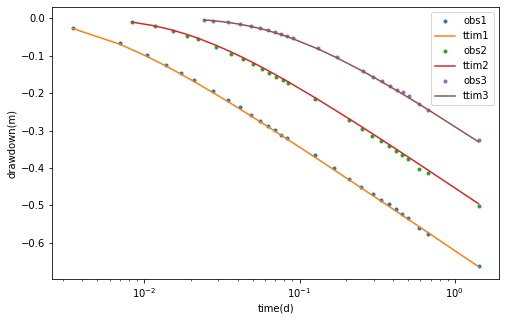

In [7]:
hm1_0 = ml_0.head(r1, 0, t1)
hm2_0 = ml_0.head(r2, 0, t2)
hm3_0 = ml_0.head(r3, 0, t3)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, h1, '.', label='obs1')
plt.semilogx(t1, hm1_0[0], label='ttim1')
plt.semilogx(t2, h2, '.', label='obs2')
plt.semilogx(t2, hm2_0[0], label='ttim2')
plt.semilogx(t3, h3, '.', label='obs3')
plt.semilogx(t3, hm3_0[0], label='ttim3')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

Try adding res and rc:

In [8]:
ml_1 = ModelMaq(kaq=10, z=[0, b], Saq=0.001, tmin=0.001, tmax=10, topboundary='conf')
w_1 = Well(ml_1, xw=0, yw=0, rw=rw, rc=0, res=0, tsandQ=[(0, Q)], layers=0)
ml_1.solve()

self.neq  1
solution complete


Calibrate with three datasets simultaneously:

When adding both res and rc into calibration, the optimized res value is bout 1.2e-12, which is close to the minimum limitation. Thus, adding res has nearly no effect on improving conceptual model's performance. res is removed from the calibration.

In [9]:
#unknown parameters: k, Saq, res, rc
ca_1 = Calibrate(ml_1)
ca_1.set_parameter(name='kaq0', initial=10)
ca_1.set_parameter(name='Saq0', initial=1e-4)
#ca_1.set_parameter_by_reference(name='res', parameter=w_1.res, initial=0, pmin = 0)
ca_1.set_parameter_by_reference(name='rc', parameter=w_1.rc, initial=0)
ca_1.series(name='obs1', x=r1, y=0, t=t1, h=h1, layer=0)
ca_1.series(name='obs2', x=r2, y=0, t=t2, h=h2, layer=0)
ca_1.series(name='obs3', x=r3, y=0, t=t3, h=h3, layer=0)
ca_1.fit(report=True)

.........................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 54
    # data points      = 77
    # variables        = 3
    chi-square         = 0.00116245
    reduced chi-square = 1.5709e-05
    Akaike info crit   = -848.779350
    Bayesian info crit = -841.747934
[[Variables]]
    kaq0:  283.922753 +/- 1.28518297 (0.45%) (init = 10)
    Saq0:  0.00415476 +/- 4.3874e-05 (1.06%) (init = 0.0001)
    rc:    0.79000886 +/- 0.21255267 (26.91%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.852
    C(Saq0, rc)   = -0.669
    C(kaq0, rc)   =  0.487


In [10]:
display(ca_1.parameters)
print('RMSE:', ca_1.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,283.923,1.285183,0.452652,-inf,inf,10,[283.92275254894827]
Saq0,0.00415476,0.000044,1.056,-inf,inf,0.0001,[0.004154762618152215]
rc,0.790009,0.212553,26.9051,-inf,inf,0,[0.7900088595416288]


RMSE: 0.0038854547009272195


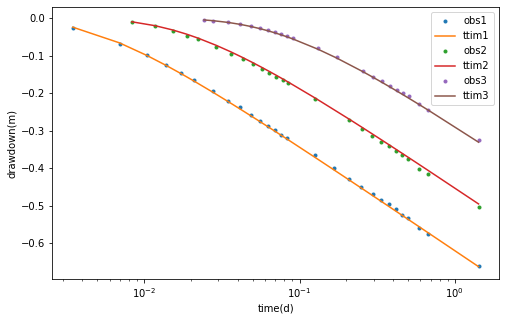

In [11]:
hm1_1 = ml_1.head(r1, 0, t1)
hm2_1 = ml_1.head(r2, 0, t2)
hm3_1 = ml_1.head(r3, 0, t3)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, h1, '.', label='obs1')
plt.semilogx(t1, hm1_1[0], label='ttim1')
plt.semilogx(t2, h2, '.', label='obs2')
plt.semilogx(t2, hm2_1[0], label='ttim2')
plt.semilogx(t3, h3, '.', label='obs3')
plt.semilogx(t3, hm3_1[0], label='ttim3')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

## Summary of values simulated by AQTESOLV

In [12]:
t = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]', 'rc'], \
                index=['AQTESOLV', 'ttim', 'ttim-rc'])
t.loc['AQTESOLV'] = [282.659, 4.211E-03, '-']
t.loc['ttim'] = np.append(ca_0.parameters['optimal'].values, '-')
t.loc['ttim-rc'] = ca_1.parameters['optimal'].values
t['RMSE'] = [0.003925, ca_0.rmse(), ca_1.rmse()]
t

,k [m/d],Ss [1/m],rc,RMSE
AQTESOLV,282.659,0.004211,-,0.003925
ttim,282.795,0.00420855,-,0.003974
ttim-rc,283.923,0.00415476,0.790009,0.003885
